In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [4]:
data = pd.read_csv("/content/DOGE-USD.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [5]:
data.corr()


<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991422,0.990888,0.987341,0.987341,0.720185
High,0.991422,1.000000,0.983262,0.992906,0.992906,0.776438
Low,0.990888,0.983262,1.000000,0.992930,0.992930,0.702538
Close,0.987341,0.992906,0.992930,1.000000,1.000000,0.761184
Adj Close,0.987341,0.992906,0.992930,1.000000,1.000000,0.761184
Volume,0.720185,0.776438,0.702538,0.761184,0.761184,1.000000


In [6]:
data['Date'] = pd.to_datetime(data['Date'],
							infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()


Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [7]:
data.isnull().sum()


Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [8]:
data = data.dropna()


In [9]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2.450000e+03
mean,0.011760,0.013060,0.010561,0.011913,0.011913,4.529887e+08
std,0.058419,0.065913,0.051187,0.058960,0.058960,2.956758e+09
min,0.000087,0.000089,0.000085,0.000087,0.000087,1.669500e+04
25%,0.000225,0.000230,0.000221,0.000225,0.000225,2.362070e+05
50%,0.002073,0.002118,0.002033,0.002078,0.002078,9.591144e+06
75%,0.003030,0.003135,0.002905,0.003032,0.003032,5.587225e+07
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

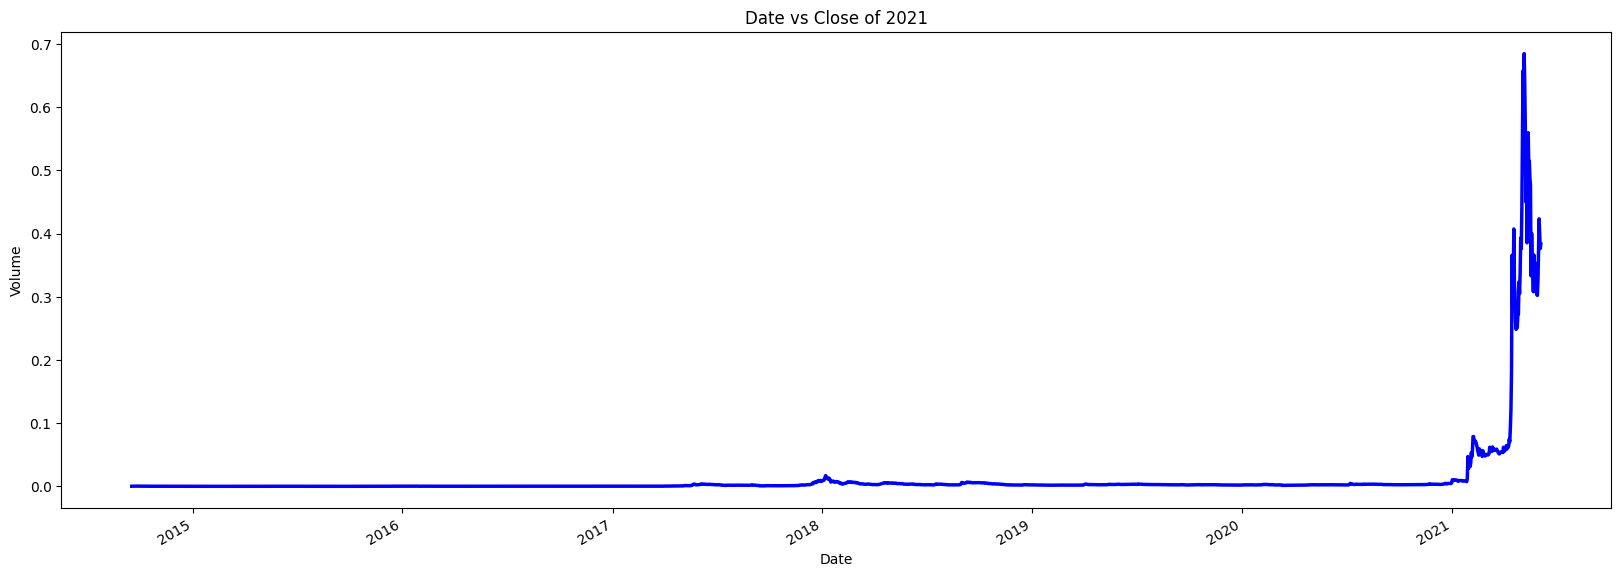

In [10]:
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")


In [11]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))


Close        1.000000
Adj Close    1.000000
Low          0.992930
High         0.992906
Open         0.987341
Volume       0.761184
b            0.631466
gap          0.586597
a            0.318396
z            0.130964
y            0.132074
Name: Close, dtype: float64

In [12]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()


,Close,Volume,gap,a,b
Date,,,,,
2014-09-17,0.000268,1463600.0,57.080400,1.150000,1.683140e+06
2014-09-18,0.000298,2215910.0,128.522780,1.217228,2.697269e+06
2014-09-19,0.000277,883563.0,28.274016,1.116364,9.863776e+05
2014-09-20,0.000292,993004.0,42.699172,1.161049,1.152926e+06
2014-09-21,0.000288,539140.0,8.087100,1.052817,5.676157e+05


In [13]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)


(11, 5) (19, 5)


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
	"Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  17.690
Date:                Sat, 28 Oct 2023   AIC                            -19.380
Time:                        09:53:43   BIC                            -16.959
Sample:                    05-07-2021   HQIC                           -22.036
                         - 05-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      4.076e-11   8.91e-12      4.575      0.000    2.33e-11    5.82e-11
gap         4.086e-11   2.15e-11      1.904      0.057   -1.19e-12    8.29e-11
a              0.0154    5.2e-22   2.96e+19      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
start = 11
end = 29
predictions = results.predict(
	start=start,
	end=end,
	exog=test.drop("Close", axis=1))
predictions


2021-05-18    0.464149
2021-05-19   -0.000145
2021-05-20    0.475115
2021-05-21    0.466248
2021-05-22    0.462575
2021-05-23    0.447174
2021-05-24    0.466455
2021-05-25    0.461902
2021-05-26    0.444607
2021-05-27    0.434197
2021-05-28    0.440598
2021-05-29    0.432421
2021-05-30    0.428009
2021-05-31    0.432570
2021-06-01    0.460512
2021-06-02    0.509979
2021-06-03    0.478255
2021-06-04    0.469062
2021-06-05    0.464898
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

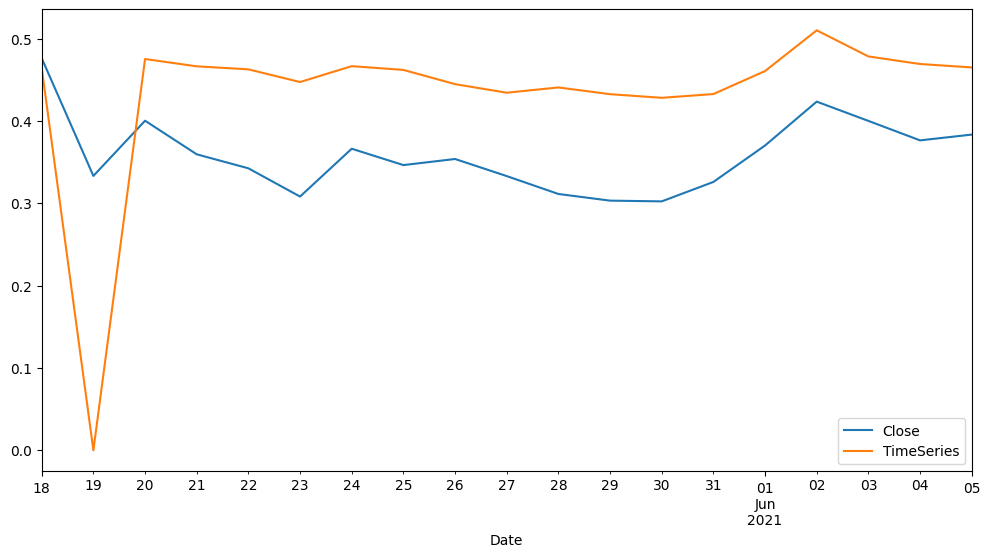

In [16]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)
